# Run your second classifier with Python: a Decision Tree

# Import data

In [1]:
import pandas as pd

#import the dataset
df = pd.read_csv('./data/diabetes.txt')
df

,timespreg,gluctol,diaspb,triceps,insulin,massindex,pedigree,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
import numpy as np

dfnp = df.to_numpy()
x=dfnp[:,0:-1] # prendiamo tutti i dati tranne l'ultima colonna -> variabili indipendenti, osservazioni
y=dfnp[:,-1] # prendiamo solo l'ultima colonna -> variabile dipendente, target

# split data into training/test set

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size =0.33, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    stratify=y,
                                                    random_state= 123) #fix random seed for replicability

In [4]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((514, 8), (514,), (254, 8), (254,))

# Train the classifier

![img](https://drive.google.com/uc?export=view&id=1BVNr55ihoPr8EGcnFYz7xQoHcdVT99i_)
![img](https://drive.google.com/uc?export=view&id=1lWO8TWy-Ec62ETJ9lzmnFNlrT2X73wfy)



Questa volta proviamo a classificare i nostri diabetici utilizzando un altro metodo, cioè un altro classificatore: il decision tree. Possiamo vedere come funziona questo classificatore dando un occhio alla figura a fianco. In questo semplice esempio, vogliamo classificare un oggetto, la nostra variabile dipendente _y_, per stabilire (classificare) se è un cerchio o un quadrato. Per fare questo, il classificatore controlla il valore delle due variabili indipendenti _x_: se $$x_1 > w_{10}$$ e $$x_2 > w_{20}$$ allora è un quadrato, altrimenti è un cerchio.
Visto così potrebbe sembrare un semplice programma che fa un paio di if. In realtà il metodo deve cercare di trovare i valori delle variabili indipendenti che meglio separano (cioè classificano) il nostro insieme in modo da dover fare meno passaggi possibili ed avere il massimo della correttezza. Potremmo avere infatti situazioni ben più complesse, come nell'esempio a fianco preso da un caso di frodi bancarie. Come vediamo si tratta di classificare molti casi diversi e ongi volta che effettuiamo una scelta, l'insieme si riduce fino ad arrivare ai singoli elementi. Notare che non sempre le classificazioni sono completamente corrette: nell'insieme d3 abbiamo anche qualche cerchio mentre nell'insieme d2 abbiamo un triangolo. Questo ci induce a pensare che il metodo nonriesca a classificare sempre tutti gli elementi in modo corretto e che anche qui, quindi, dovremo parlare di indicatori per valutare la sua bontà.

__Ma da quali variabili indipendenti parte il metodo del decision tree per iniziare (e poi continuare) a suddividere i vari elementi in classi?__ Ci sono diverse criteri: noi utilizzeremo il Gini Index (introdotto dallo statistico italiano Corrado Gini per misurare la disuguaglianza in una distribuzione). Il coefficiente di Gini è un numero compreso tra 0 ed 1 ed è spesso usato per valutare se la ricchezza di un paese è distribuita equamente o no. Valori bassi del coefficiente indicano una distribuzione abbastanza omogenea, con il valore 0 che corrisponde alla pura equidistribuzione, ad esempio la situazione in cui tutti percepiscono esattamente lo stesso reddito; valori alti del coefficiente indicano una distribuzione più diseguale, con il valore 1 che corrisponde alla massima concentrazione, ovvero la situazione dove una persona percepisca tutto il reddito del paese mentre tutti gli altri hanno un reddito nullo.
Nel caso del decision tree siamo interessati a trovare i valori di una certa variabile indipendente capaci di suddividere gli elementi in classi il più possibili omogenee, cioè con tutti i valori uguali, in modo da dover fare meno suddivisioni ed avere un albero con meno livelli: questo corrisponde a scegliere una variabile che permetta di avere un indice di Gini basso.

Altra domanda: __quando ci dobbiamo fermare nella suddivisione (split) di un gruppo in sottogruppi?__ O, in altre parole, quanti livelli deve avere un albero? La risposta potrebbe essere quella di andare avanti ad effettuare le suddivisioni fino a quando non raggiungiamo dei sottoinsiemi finali (foglie) contenenti un solo elemento. Così facendo però il metodo soffrirebbe di __overfitting__, cioè sarebbe troppo ben "allenato" su un certo set di dati da non riuscire a fare poi previsioni corrette su altri set di dati.

Vediamo ora di applicare il decision tree al caso dei diabetici. Noteremo che il procedimento sarà lo stesso di quello già visto.

In [5]:
# importiamo il metodo che vogliamo utilizzara (tra i tanti disponibili...)
from sklearn import tree

# impostiamo i parametri del metodo
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
tree_clf = tree.DecisionTreeClassifier(criterion="gini", # criteri per stabilire come splittare
                                       max_depth=4, # profondità dell'albero per evitare l'overfitting
                                       min_samples_split=30, # dimensione minima del sottogruppo a cui fermarsi (no more split)
                                       max_leaf_nodes=6, # numero dei nodi foglia
                                       min_samples_leaf=4 # numero di campioni per essere una foglia
                                      )

# prima parte: dobbiamo fare in modo che il metodo impari dalle informazioni a disposizione
tree_clf.fit(X_train,y_train)

# seconda parte: vediamo se il metodo ha imparato bene facendogli prevedere i risultati 
predict = tree_clf.predict(X_test)

# visualizziamo il risultato (solo i primi dieci pazienti)
print(f'dati predetti dal metodo =                {predict[:10]}') # dati predetti dal metodo
print(f'dati reali presenti nel dataset di test = {y_test[:10]}') # dati effettivi presenti nel test set

dati predetti dal metodo =                [0. 1. 1. 0. 1. 0. 1. 0. 1. 1.]
dati reali presenti nel dataset di test = [1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]


# Evaluate the results

Per valutare il nostro metodo, come abbiamo fatto anche per il K-NN visualizziamo la  "confusion matrix"

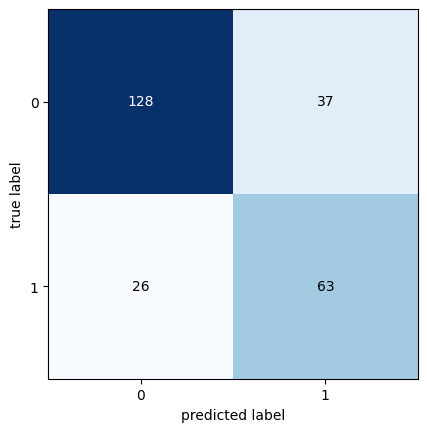

In [6]:
#plots IMPORTS
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict))
plt.show()

Questo metodo è meglio o peggio del K-NN nella classificazione dei diabetici? Confrontiamo le due confusion matrix (a sinistra quella relativa al metodo K-NN a destra quella relativa al metodo del decision tree):

<img src="https://drive.google.com/file/d/1p3vrnHthr-Uu71kFkG24Z5U4PZ3VmgKa" width="600" align="left"><img src="Images/cm decision tree.png" width="350" align="right">

Cosa possiamo dire?

Visualizziamo anche i report con _accuracy, precision, recall_ ed _f1-score_ :

In [7]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

         0.0       0.83      0.78      0.80       165
         1.0       0.63      0.71      0.67        89

    accuracy                           0.75       254
   macro avg       0.73      0.74      0.73       254
weighted avg       0.76      0.75      0.75       254



Confrontiamolo con il report del K-NN (a sinistra K-NN, a destra decision tree):

<img src="https://drive.google.com/uc?export=view&id=1p3vrnHthr-Uu71kFkG24Z5U4PZ3VmgKa" width="410" align="left"><img src="https://drive.google.com/uc?export=view&id=1Is_R1IkAjiQpFZNlzlqBl6Q_t_5P0Ngt" width="450">

Quale metodo è il migliore per il nostro caso di studio?

Proviamo ora a fare la previsione per la nostra solita signora Maria:

In [8]:
# previsione per Maria
Maria = [[10., 68., 106., 23., 49., 35.5, 0.285, 47.]]
predictMaria = tree_clf.predict(Maria)
predictMaria

array([0.])

La risposta è 0, cioà anche con questo metodo prevediamo che Maria non abbia il diabete. Ma vediamo ora che cosa sarebbe successo se Maria avesse un indice relativo all'insulina di 159 invece che 49:

In [9]:
# nuova previsione per Maria
Maria = [[10., 68., 106., 23., 159., 35.5, 0.285, 47.]]
predictMaria = tree_clf.predict(Maria)
predictMaria

array([0.])

La risposta è ancora 0, cioè il metodo dice che Maria, con questi nuovi valori, non avrebbe comunque il diabete. Notare che l'altro metodo (K-NN) ci aveva detto invece che Maria, con questi valori, avrebbe avuto il diabete.

Questo fatto ci fa capire quanto sia importante, nel Machine Learning, il "fattore umano", cioè la capacità del data analyst di utilizzare in modo appropriato i metodi che le varie librerie mettono a disposizione. 

Come ultimo aspetto della nostra trattazione, visualizziamo l'abero che è stato generato dal metodo.

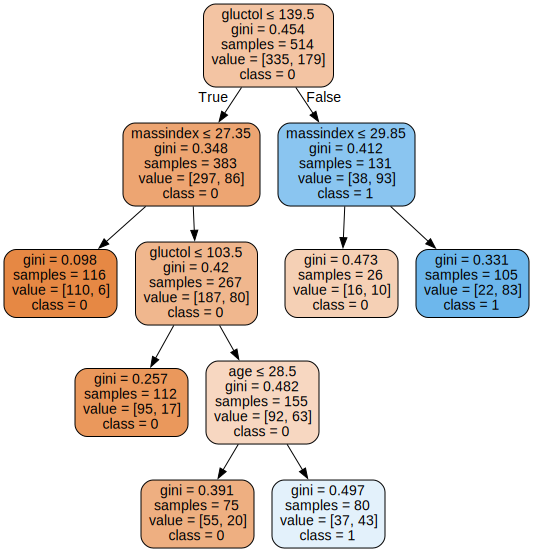

In [10]:
#save the feature list into a vector (sono i nomi delle colonne del dataset)
features=list(df.columns.values)

import graphviz
dot_data = tree.export_graphviz(tree_clf, out_file=None, 
                     feature_names=features[0:-1],  
                     class_names=['0','1'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render('diabetes')
graph

<img src="https://drive.google.com/uc?export=view&id=1OFpmWp06gdcejF-I2-sSstTgHZvIhPe5" width="500" align="left">

Vediamo come si è mosso il metodo. Tra le variabili indipendenti, ha scelto di partire da _gluctol_ che aveva un indice di Gini di 0,454. Ha scelto il valore con cui effettuare il confronto (139.5) e ha suddiviso (split) i dati in due sottoinsiemi, quelli con _gluctol_ <= 139.5 (335 campioni) e gli altri (179 campioni). Dopodichè ha lavorato sui valori di un'altra variabile indipendente, _massindex_ ed è riuscito ad ottenere le prime tre foglie. A quel punto ha riutilizzzato nuovamente  _gluctol_ (perché tra tutte le variabili indipendenti era quella con l'indice di Gini più basso) ottenendo una nuova foglia e un sottoinsieme di cui ha analizzato l'età per ottenere le ultime due foglie.

E' anche possibile vedere lo stesso albero in forma testuale:

In [12]:
from sklearn.tree import export_text
r = export_text(tree_clf, feature_names=features[0:-1])
print(r)

|--- gluctol <= 139.50
|   |--- massindex <= 27.35
|   |   |--- class: 0.0
|   |--- massindex >  27.35
|   |   |--- gluctol <= 103.50
|   |   |   |--- class: 0.0
|   |   |--- gluctol >  103.50
|   |   |   |--- age <= 28.50
|   |   |   |   |--- class: 0.0
|   |   |   |--- age >  28.50
|   |   |   |   |--- class: 1.0
|--- gluctol >  139.50
|   |--- massindex <= 29.85
|   |   |--- class: 0.0
|   |--- massindex >  29.85
|   |   |--- class: 1.0

